## Basics
---

Exploring the popular MNIST dataset.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Read in all the data into separate python variables

In [3]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Let's view few random images and its label. 
* **Step 1**: Import the necessary packages

In [13]:
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow

* **Step 2**: Create a function that takes in a normalized mnist numpy array, scales it up to grayscale and displays it inline

In [14]:
def show_mnist_image(image_array, label_array):  
    # Show the image label
    print("Image label: %d"%(label_array.argmax()))
    # Display the image inline
    pil_image = Image.fromarray(((image_array.reshape(28,28)) * 256).astype('uint8'), "L")
    %matplotlib inline
    imshow(ImageOps.invert(pil_image), cmap='gray')

* **Step 3**: Select a random image and display its label and the image

Image label: 1


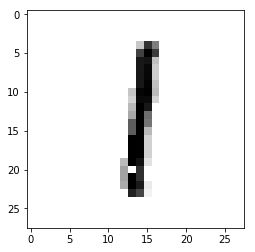

In [15]:
# Pull a random image
random_image_number = 500
random_image = X_train[random_image_number]
random_image_label = Y_train[random_image_number]

show_mnist_image(random_image, random_image_label)

---
## Introduction
---
Explore basic tensorflow datatypes and some basic operations. Explore the use of tensorflow sessions

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create a tensorflow constant
hello = tf.constant("Hello Tensorflow")
# Create a new session
sess = tf.Session()
# Print the constant
print(sess.run(hello))

b'Hello Tensorflow'


In [17]:
# run addition and multiplication operations

a = tf.constant(25, tf.float32)
b = tf.constant(5, tf.float32)

with tf.Session() as sess:
    print("A = %f"%sess.run(a))
    print("B = %f"%sess.run(b))
    print("A + B = %f"%sess.run(a+b))
    print("A * B = %f"%sess.run(a*b))
    print("A / B = %f"%sess.run(a/b))
    print("A + B using tf add = %f"%sess.run(tf.add(a, b)))
    print("A * B using tf multiply = %f"%sess.run(tf.multiply(a, b)))

A = 25.000000
B = 5.000000
A + B = 30.000000
A * B = 125.000000
A / B = 5.000000
A + B using tf add = 30.000000
A * B using tf multiply = 125.000000


> *For placeholders, an optional argument `shape` can be used to make sure the input dimensions matches the required tensor dimensions. *

> *If this is missing or `None` (default), then the placeholder can accept any shape.*

In [18]:
# Run addition and multiplication with placeholders

c = tf.placeholder(tf.float32, shape=())
d = tf.placeholder(tf.float32, shape=())

sum = tf.add(c, d)
prod = tf.multiply(c, d)

with tf.Session() as sess:
    
    print("Operations by feeding values")
    print("C = %f"%sess.run(c, feed_dict={c: 4}))
    print("D = %f"%sess.run(d, feed_dict={d: 6}))
    print("Sum = %f"%sess.run(sum, feed_dict={c: 4, d: 6}))
    print("Prod = %f"%sess.run(prod, feed_dict={c: 4, d: 6}))

Operations by feeding values
C = 4.000000
D = 6.000000
Sum = 10.000000
Prod = 24.000000


In [19]:
# Matrix operations with placeholders

mat1 = tf.placeholder(tf.float32, shape=(2,2))
mat2 = tf.placeholder(tf.float32, shape=(2,1))

matmul = tf.matmul(mat1, mat2)

with tf.Session() as sess:
    print("Matrix multiplication using python lists as feed dict values")
    print(sess.run(matmul, feed_dict={ mat1: [[1,2],[2,1]], mat2: [[1],[2]]}))
    print("Matrix multiplication using numpyarrays as feed dict values")
    print(sess.run(matmul, feed_dict={ mat1: np.array([[1,2],[2,1]]), mat2: np.array([[1],[2]])}))

Matrix multiplication using python lists as feed dict values
[[ 5.]
 [ 4.]]
Matrix multiplication using numpyarrays as feed dict values
[[ 5.]
 [ 4.]]


---
## Basic Models
---

#### Nearest Neighbors

Build a nearest neighbors classifier using a subset of mnist data

In [39]:
# Read only a subsample
Xtr, Ytr = mnist.train.next_batch(5000)
Xte, Yte = mnist.test.next_batch(200)

In [53]:
# Create placeholders
xtr = tf.placeholder(tf.float32, shape=(None, 784))
xte = tf.placeholder(tf.float32, shape=[784])

* 1) `tf.substract`: This takes in an array with any number of rows and 784 columns (xtr) and a vector of only 784 elements and subtracts. The operation is a **broadcast** operation where each row of `xtr` is subtracted by xte.
* 2) `tf.square`: This performs elementwise squaring for each of the difference
* 3) `tf.reduce_sum`: This reduces the `784` columns to a single column by summing them all along the first axis.
* 4) `tf.srqt`: This computes the square root to return the distance. Now *distance* is a column of individual distances.
* 5) `pred`: use arg_min to get the index of the closest training example 

In [100]:
# Create L2 distance for all the images
distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(xtr, xte)), axis=1))
# Prediction is the image with the lowest distance
nearest_neighbor = tf.arg_min(distance, 0)

accuracy = 0

# Initializing global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Run initialization
    sess.run(init)
    
    # Loop over all the test data
    for i in range(len(Xte)):
        # Get the nearest neighbor, i.e the row number/example number from the training dataset
        nearest_neighbor_index = sess.run(nearest_neighbor, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        # Extract the predicted label
        predicted_label = np.argmax(Ytr[nearest_neighbor_index,:])
        # Get the actual label and compare it 
#         print("Example: %d\t"%i, "Predicted: %d\t"%predicted_label, "Actual: %d"%np.argmax(Yte[i]))
        # Calculate accuracy
        if predicted_label == np.argmax(Yte[i]):
            accuracy += 1
    print("Classification done. Accuracy: %f"%(accuracy/len(Xte)))

Classification done. Accuracy: 0.895000


Reimplement the nn to have k = 5

In [101]:
# Create L2 distance for all the images
distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(xtr, xte)), axis=1))
# Prediction is the image with the lowest distance
# Use the top k function but flip the distance scores with a engative sign
nearest_neighbors = tf.nn.top_k(tf.negative(distance), k=5)[1]

accuracy = 0

# Initializing global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Run initialization
    sess.run(init)
    
    # Loop over all the test data
    for i in range(len(Xte)):
        # Get the nearest neighbor, i.e the row number/example number from the training dataset
        nearest_neighbor_indices = sess.run(nearest_neighbors, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        # Extract the predicted labels
        predicted_label = np.argmax(np.sum(Ytr[nearest_neighbor_indices,:], 0))
        # Get the actual label and compare it 
#         print("Example: %d\t"%i, "Predicted: %d\t"%predicted_label, "Actual: %d"%np.argmax(Yte[i]))
        # Calculate accuracy
        if predicted_label == np.argmax(Yte[i]):
            accuracy += 1 
    print("Classification done. Accuracy: %f"%(accuracy/len(Xte)))

Classification done. Accuracy: 0.905000
